In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd

df = pd.read_csv("Boston Predicted House Price.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Predicted Price(Approx.)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,23.964398
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.194154
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.749864
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,37.449864
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,35.802312


In [5]:
# Separate features and target
X = df.drop(['PRICE', 'Predicted Price(Approx.)'], axis=1)
y = df['PRICE']

print(X.shape)
print(y.shape)


(506, 13)
(506,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)


(354, 13) (152, 13)


In [7]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=5
)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [8]:
y_pred = dt_model.predict(X_test)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


MSE : 11.122130049464607
RMSE: 3.33498576450704
R2  : 0.8507359013244257


In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    dt_model,
    X,
    y,
    cv=5,
    scoring='neg_mean_squared_error'
)

rmse_scores = (-cv_scores) ** 0.5

print("CV RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())


CV RMSE scores: [3.22419807 5.52533373 5.11511321 6.98800496 8.73834489]
Average RMSE: 5.918198973491023


In [11]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


RM         0.610249
LSTAT      0.194896
DIS        0.109909
CRIM       0.065393
B          0.007232
PTRATIO    0.004775
AGE        0.003614
NOX        0.002620
CHAS       0.001311
ZN         0.000000
INDUS      0.000000
RAD        0.000000
TAX        0.000000
dtype: float64

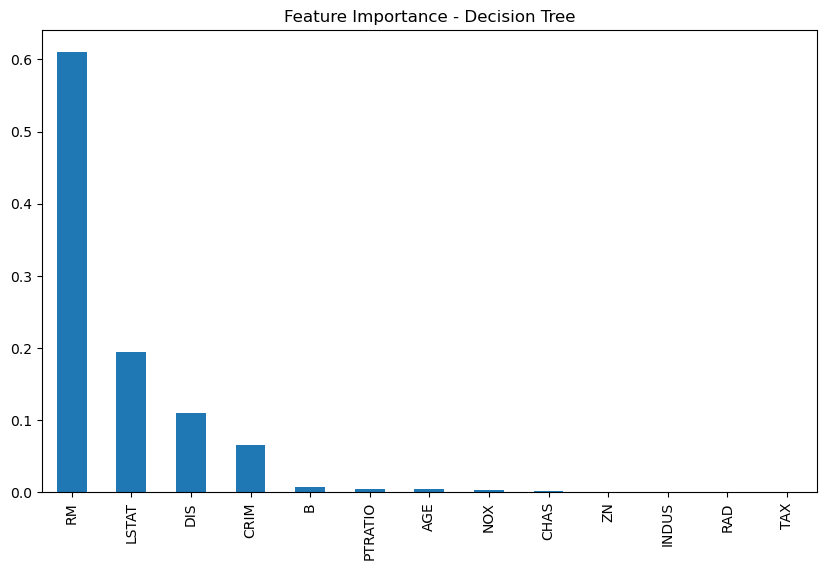

In [12]:
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Decision Tree")
plt.show()


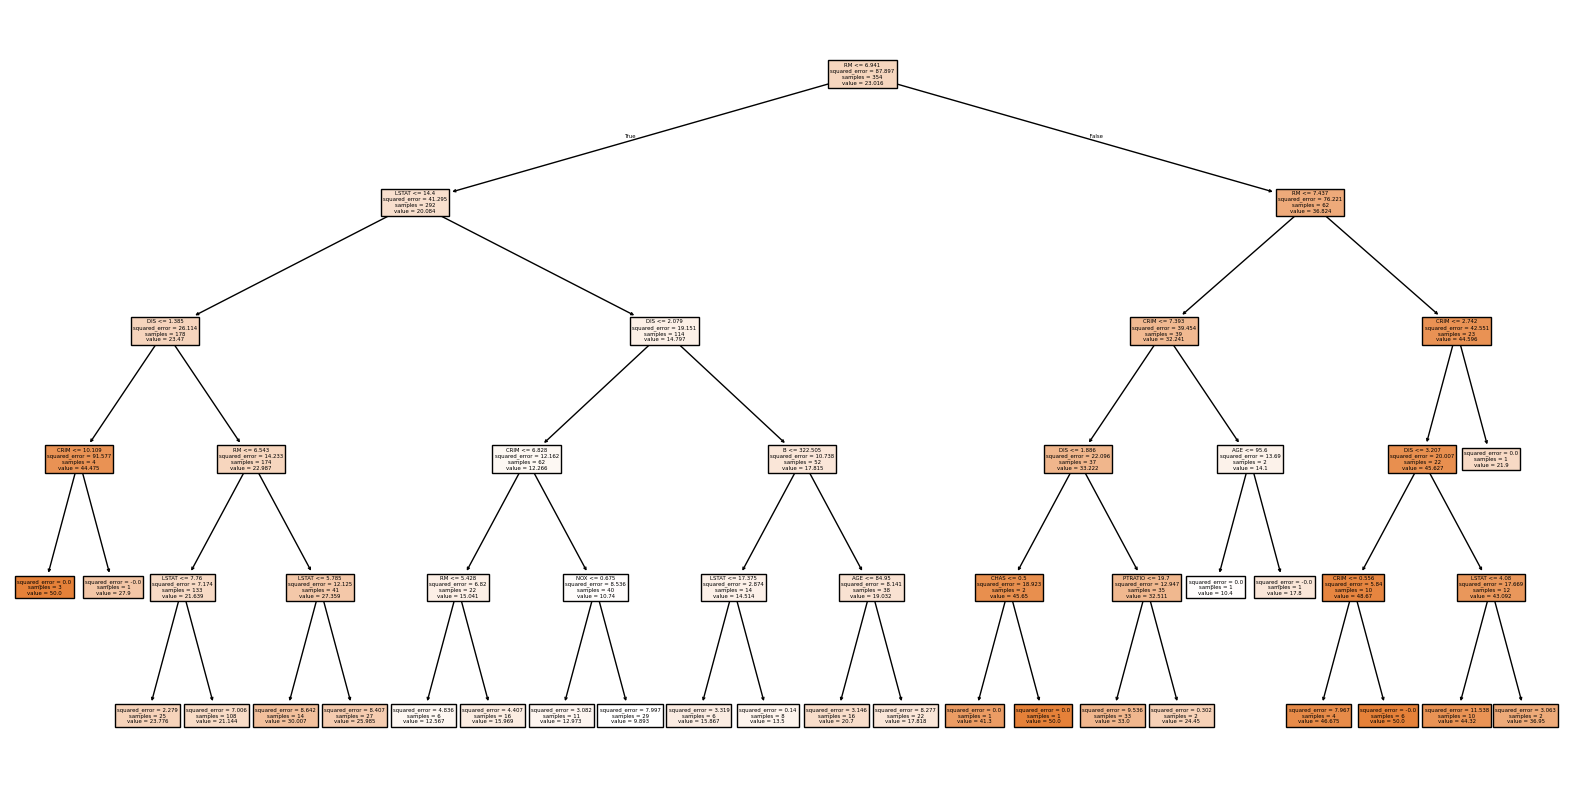

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True)
plt.show()
